#### [ 미니 테스트  2024-03-14 ]<hr>

[1] 지도학습에 대한 설명과 종류에 대해서 간략하게 설명해 주세요.

데이터와 라벨을 주고 정답을 알려주면서 기계를 학습하는 방법, 종류에는 회귀와 분류가 있다.

[2] 지도학습의 학습 프로세스를 간략하게 설명해 주세요.

데이터확인(상관계수 및 시각화) -> 데이터 전처리(인코딩, 범주화, 스케일링, 이상치-중복치-결측치 제거 or 대체) -> 데이터셋 나누기 -> 모델 학습 -> 모델 평가 -> 예측 -> 활용

[3] 선형회귀 대해 간략하게 설명해주세요.  
    - 개념  
    - 조건  
    - 동작원리  
    - 선형식  
    - 오차/잔차 계산 방법  

- 선형회귀는 데이터에 대한 선형 관계를 가정하여 데이터를 예측하는 모델
- 상관계수를 봤을때, 상관계수가 높거나,  산점도를 확인 했을때, 데이터가 선형적으로 분포되어 있어야 한다.
- 오차가 가장 적은 선을 찾는다.
- 선형식 : 예측값 = 가중치 * 입력값 + 절편
- 오차/잔차 계산 방법 : 오차 = 타겟값 - 예측

[4] 로지스틱회귀 대해 간략하게 설명해주세요.  
   - 개념  
   - 조건  
   - 동작원리  
   - 선형식  
   - 오차/잔차 계산 방법  

- 로지스틱회귀는 분류 문제를 해결하기 위한 회귀 모델 : 2진 분류 / 0 아니면 1
- 타겟의 개수가 2개이고, 예측값이 0과 1 사이여야 한다. 
- 
- 
- 타겟이 1일때 오차값 + 타겟이 0일때 오차값 / 오차함수가 총 두개

[5] Fashion MNIST 데이터셋에서 10개 카테고리 중 하나를 선택해서 2진 분류로 구현해 주세요.  
- 데이터셋 : scikit-learn의 datasets 사용
    - from sklearn.datasets import fetch_openml 
    - db_name = 'Fashion-MNIST'
    - fashion_data = fetch_openml(name=db_name, parser='auto')

[1] 모듈 로딩

In [78]:
from sklearn.datasets import fetch_openml
import pandas as pd
import torch
import torch.nn as nn      # LinearRegressoion 기능의 클래스 Linear
import torch.nn.functional as F
import torch.optim as optim
from sklearn.preprocessing import OneHotEncoder

In [79]:
fashion_data = fetch_openml(name='Fashion-MNIST', parser='auto',as_frame=True) 

In [80]:
fashion_data['feature_names'], fashion_data['target_names'], fashion_data['categories']  # DF면 categories 속성 볼 수 없음 - 고유값 확인 속성
# DF의 경우 target.unique()

(['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  'pixel52',
  'pixel53',
  'pixel54',
  'pixel55',
  'pixel56',
  'pixel57',
  'pixel58',
  'pixel59',
  'pixel60',
  'pixel61',
  'pixel62',
  'pixel63',
  'pixel64',
  'pixel65',
  'pixel66',
  'pixel67',
  'pixel68',
  'pixel69',
  'pixel70',
  'pixel71',
  'pixel72',
  'pixel73',
  'pixel74',
  'pixel75',
  'pixel76',
  'pixel77',
  'pixel

[2] 데이터 가공 및 전처리 <hr>
- 결측 / 중복 / 이상치 => 없음
- 다중분류 ==> 2진분류 변환 : target 변환
- 표준화 ==> 이미지 동일 크기 및 색상 채널 : 동일 크기(28*28)와 채널(흑백 1)
- 정규화 ==> 피쳐 정규화 / 타겟 정규화

In [81]:
# 정규화 ==> 피쳐 정규화 : 784개는 색상값 즉, 0 ~ 255 범위의 값
feature = fashion_data.data / 255.   # 실수로 나누기 ! => 정수/실수 = 실수 => 형변환
target = fashion_data.target

In [82]:
feature.shape, target.shape

((70000, 784), (70000,))

In [83]:
target = target.astype('float')

In [84]:
target.value_counts() # 0과 나머지

class
9.0    7000
0.0    7000
3.0    7000
2.0    7000
7.0    7000
5.0    7000
1.0    7000
6.0    7000
4.0    7000
8.0    7000
Name: count, dtype: int64

In [85]:
# 다중분류  ==> 2진분류 변환 : target 변환
target.replace([1,2,3,4,5,6,7,8,9],1, inplace = True)
target.value_counts()

class
1.0    63000
0.0     7000
Name: count, dtype: int64

In [86]:
# 원핫 인코딩
# sparse_output = False : ndarray 타입으로 반환
# encoder = OneHotEncoder(sparse=False) 
# encoder.fit([target])

In [87]:
# encoder.transform([target]) # sparse = False 라서 바로 풀려서 반환

In [88]:
# target = encoder.transform([target])

In [89]:
# target.shape, target.ndim

In [90]:
# encoder.transform([target]).toarray()  # 풀기 위해서 toarray() # sparse = False 하면 그럴 필요 없음

[3] 학습 준비 <hr>
- 텐서화
- 데이터셋 준비 : 훈련용, 테스트용
- 학습 방법 : 지도학습 - 이진분류 => Linear 클래스 + Sigmoid 함수
- 최적화 방법 : 경사하강법 기반의 방법 => Adm, SGD, ...
- 손실 함수 : 이진분류 손실 계산 함수=> binary_cross_entropy

In [91]:
### ===> 데이터셋 준비 : 60000개 훈련, 10000개 테스트

In [92]:
limit = 60000
xtrain = feature[:limit]
ytrain = target[:limit]

xtest = feature[limit:]
ytest = target[limit:]
ytrain, ytest

(0        1.0
 1        0.0
 2        0.0
 3        1.0
 4        0.0
         ... 
 59995    1.0
 59996    1.0
 59997    1.0
 59998    0.0
 59999    1.0
 Name: class, Length: 60000, dtype: float64,
 60000    1.0
 60001    1.0
 60002    1.0
 60003    1.0
 60004    1.0
         ... 
 69995    1.0
 69996    1.0
 69997    1.0
 69998    1.0
 69999    1.0
 Name: class, Length: 10000, dtype: float64)

In [93]:
# 텐서로 바꾸기
xtrain = torch.tensor(xtrain.values, dtype = torch.float32)
xtest = torch.tensor(xtest.values, dtype = torch.float32)

In [94]:
xtrain.shape, xtrain.ndim

(torch.Size([60000, 784]), 2)

In [95]:
ytrain = torch.tensor(ytrain.values, dtype = torch.float32).unsqueeze(dim = 1)
ytest = torch.tensor(ytest.values, dtype = torch.float32).unsqueeze(dim = 1)

In [96]:
ytrain.shape, ytest.shape

(torch.Size([60000, 1]), torch.Size([10000, 1]))

In [97]:
# 텐서 원핫 인코딩
# y_one_hot = torch.zeros(60000,2)
# y_one_hot.scatter_(1, ytrain.long(), 1)

In [98]:
## 학습 인스턴스 생성
in_,out_ = xtrain.shape[1], ytrain.shape[1]
model = nn.Linear(in_,out_)
model

Linear(in_features=784, out_features=1, bias=True)

In [99]:
## 최적화 인스턴스 생성
optimizer = (optim.Adam(model.parameters()))

[4] 학습 <hr>
- 반복횟수만큼 학습을 진행

In [100]:
# 학습 횟수 => 샘플 처음부터 끝까지 읽는 것 기준으로 횟수 지정
epochs = 150 
loss_accuracy = [[],[]]
min_loss = 100.0
for epoch in range(epochs+1):
    # 모델 학습
    ypre = model(xtrain)
    # 분류값 변환
    ypre2 = F.sigmoid(ypre)
    loss = F.binary_cross_entropy(ypre2,ytrain)
    
    optimizer.zero_grad()
    loss.backward() # 손실함수 계산값으로 미분 진행하여 새로운 W, b 계산
    optimizer.step() # 업데이트
    
    # 정확도 계산 => 예측값을 0과 1로 변환 => 정단과 비교
    train_accuracy = (ytrain == (ypre2 >=0.5)).sum() / ytrain.shape[0]
    
    loss_accuracy[0].append(loss.item())
    loss_accuracy[1].append(train_accuracy)
    print(f'[ {epoch} / {epochs} ] loss = {loss.item()} accuracy = {train_accuracy} ')
    

[ 0 / 150 ] loss = 0.7141015529632568 accuracy = 0.4124000072479248 
[ 1 / 150 ] loss = 0.6310162544250488 accuracy = 0.7408166527748108 
[ 2 / 150 ] loss = 0.5631771087646484 accuracy = 0.8807166814804077 
[ 3 / 150 ] loss = 0.5096501111984253 accuracy = 0.8972499966621399 
[ 4 / 150 ] loss = 0.468742698431015 accuracy = 0.8994666934013367 
[ 5 / 150 ] loss = 0.4383537769317627 accuracy = 0.8998666405677795 
[ 6 / 150 ] loss = 0.4163256883621216 accuracy = 0.8999999761581421 
[ 7 / 150 ] loss = 0.40068164467811584 accuracy = 0.8999999761581421 
[ 8 / 150 ] loss = 0.3897400498390198 accuracy = 0.8999999761581421 
[ 9 / 150 ] loss = 0.3821415603160858 accuracy = 0.8999999761581421 
[ 10 / 150 ] loss = 0.37682703137397766 accuracy = 0.8999999761581421 
[ 11 / 150 ] loss = 0.3729931712150574 accuracy = 0.8999999761581421 
[ 12 / 150 ] loss = 0.3700442612171173 accuracy = 0.8999999761581421 
[ 13 / 150 ] loss = 0.3675476908683777 accuracy = 0.8999999761581421 
[ 14 / 150 ] loss = 0.3651959

Text(0.5, 1.0, '[training loss and accuracy]')

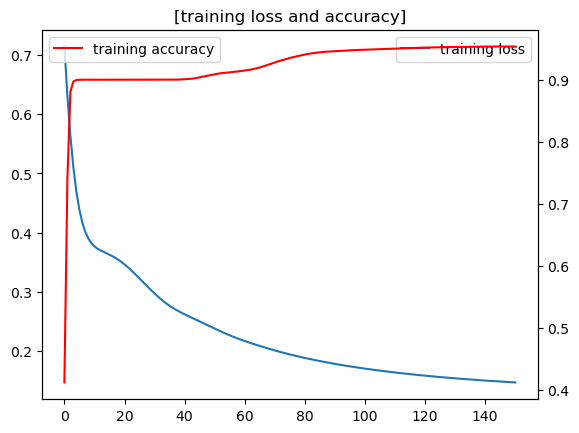

In [101]:
# 손실과 정확도 시각화
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(loss_accuracy[0], label = 'training loss')
ax1.legend()
ax1.twinx()
plt.plot(loss_accuracy[1], label = 'training accuracy', color = 'red')
plt.legend()
plt.title('[training loss and accuracy]')
